In [1]:
import pickle
import numpy as np
import pandas as pd
import os
from collections import Counter

# Modules nécessaires de RDKit 
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
#from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions


Traceback (most recent call last):
  File "/home/souiai/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/rdkit/Chem/PandasTools.py", line 130, in <module>
    if 'display.width' in pd.core.config._registered_options:
AttributeError: module 'pandas.core' has no attribute 'config'


In [2]:
data = pd.read_csv("fda.txt", delimiter='\t')

In [3]:
data.head()

,generic_name,cns_drug,smiles
0,Abacavir,False,NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1
1,Abarelix,False,NaN
2,Abatacept,False,NaN
3,Abciximab,False,NaN
4,Abiraterone,False,CC(=O)O[C@H]1CC[C@]2(C)C3CC[C@@]4(C)C(CC=C4C4=...


In [4]:
mols=[]
names=[]
i=-1
for x in data["smiles"] :
    i=i+1
    try :
        #Chem.GetMorganFingerprintAsBitVect(data['mol'][i],2, nBits = 2048)
        mol = Chem.MolFromSmiles(x) 
        mols.append(mol)
        print(data['generic_name'][i])
        names.append(data['generic_name'][i])
    except:
        print("NaN")
print(len(mols))

Abacavir
NaN
NaN
NaN
Abiraterone
Acamprosate
Acarbose
Acebutolol
Acenocoumarol
Acepromazine
Aceprometazine
Acetaminophen
Acetazolamide
Acetic acid
Acetohexamide
Acetohydroxamic Acid
Acetophenazine
Acetylcysteine
Acetyldigitoxin
Acetylsalicylic acid
Acitretin
Aclidinium
Acyclovir
NaN
Adapalene
Adefovir Dipivoxil
Adenine
Adenosine
Adenosine monophosphate
Adenosine triphosphate
Adinazolam
NaN
Afatinib
NaN
NaN
Agomelatine
Ajmaline
Albendazole
Alcaftadine
Alclometasone
NaN
NaN
NaN
Alendronate
Alfacalcidol
Alfentanil
Alfuzosin
NaN
NaN
Aliskiren
Alitretinoin
Alizapride
Allopurinol
Allylestrenol
Almitrine
Almotriptan
Alogliptin
Alosetron
NaN
Alpha-Linolenic Acid
Alprazolam
Alprenolol
Alprostadil
NaN
NaN
Altretamine
Aluminium
Aluminum hydroxide
Alverine
Alvimopan
Amantadine
Ambenonium
Amcinonide
Amdinocillin
Amifostine
Amikacin
Amiloride
Aminocaproic Acid
Aminoglutethimide
Aminohippurate
Aminolevulinic acid
Aminophenazone
Aminophylline
Aminosalicylic Acid
Amiodarone
Amisulpride
Amitriptyline
Am

Spirapril
Spironolactone
Stanozolol
Stavudine
Stepronin
NaN
Streptomycin
Streptozocin
Succimer
Succinic acid
Succinylcholine
Sucralfate
Sufentanil
Sulfacetamide
Sulfacytine
Sulfadiazine
Sulfadimethoxine
Sulfadoxine
Sulfamerazine
Sulfamethazine
Sulfamethizole
Sulfamethoxazole
Sulfametopyrazine
Sulfamoxole
Sulfanilamide
Sulfaphenazole
Sulfapyridine
Sulfasalazine
Sulfathiazole
Sulfinpyrazone
Sulfisoxazole
Sulfoxone
Sulindac
NaN
Sulpiride
Sumatriptan
Sunitinib
Suprofen
Suramin
Tacrine
Tacrolimus
Tadalafil
Tafluprost
Talbutal
NaN
Tamibarotene
Tamoxifen
Tamsulosin
Tapentadol
Tasosartan
Tauroursodeoxycholic acid
Tazarotene
Tazobactam
NaN
NaN
Telaprevir
Telavancin
Telbivudine
Telithromycin
Telmisartan
Temazepam
Temozolomide
Temsirolimus
NaN
Teniposide
Tenofovir
Tenoxicam
Terazosin
Terbinafine
Terbutaline
Terconazole
Terfenadine
NaN
NaN
Terlipressin
NaN
Testolactone
Testosterone
Testosterone Propionate
Tetrabenazine
Tetracycline
Tetrahydrobiopterin
Tetrahydrofolic acid
Thalidomide
Theobromine
T

In [5]:
print(len(names))

1497


In [6]:
names=np.asarray(names)
mols = np.asarray(mols)

In [7]:
print(names)

['Abacavir' 'Abiraterone' 'Acamprosate' ... 'Zonisamide' 'Zopiclone'
 'Zuclopenthixol']


In [8]:
fda_ap = [Chem.GetHashedAtomPairFingerprintAsBitVect(m) for m in mols]

In [9]:
np.save('fda_ap.npy', fda_ap)

In [10]:
f=open('RF_ap_model.sav', 'br')
rfc = pickle.load(f)

/home/souiai/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/souiai/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
fda_pred = rfc.predict(fda_ap)

In [12]:
print((fda_pred==1).sum())

150


In [13]:
fda_proba = rfc.predict_proba(fda_ap)

In [14]:
print(fda_proba[:,0])

[0.63 0.69 0.83 ... 0.66 0.69 0.09]


In [15]:
ind = (fda_pred==1)
print(ind.shape)
print(ind.sum())

(1497,)
150


In [16]:
idx = (fda_proba[:,0]>=0.92)
print(idx.sum())
print(names[idx])
print(fda_proba[idx])
#print(sel_mol)

sel_prob = fda_proba[:,0][idx]
sel_names = names[idx]
sel_mol = mols[idx]


15
['Acebutolol' 'Albendazole' 'Benzthiazide' 'Betazole' 'Dibucaine'
 'Domperidone' 'Esomeprazole' 'Ethacrynic acid' 'Ganciclovir' 'Lidocaine'
 'Melatonin' 'Mepivacaine' 'Omeprazole' 'Pyrazinamide' 'Ticlopidine']
[[0.94 0.06]
 [0.97 0.03]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.93 0.07]
 [0.92 0.08]
 [0.94 0.06]
 [0.94 0.06]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.97 0.03]
 [0.92 0.08]]


In [24]:
x = np.argsort(1-sel_prob)
sorted_names = [sel_names[i] for i in x]
print(sorted_names)
sorted_mol = [sel_mol[i] for i in x]
sorted_prob = [sel_prob[i] for i in x]
print(sorted_prob)
#sortedp = fda_proba[np.argsort(fda_proba[:,0])]
#print(sortedp)
#print(names[sortedp[:,0]>0.92])

['Albendazole', 'Pyrazinamide', 'Acebutolol', 'Ethacrynic acid', 'Ganciclovir', 'Domperidone', 'Benzthiazide', 'Betazole', 'Dibucaine', 'Esomeprazole', 'Lidocaine', 'Melatonin', 'Mepivacaine', 'Omeprazole', 'Ticlopidine']
[0.97, 0.97, 0.94, 0.94, 0.94, 0.93, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]


In [18]:
#print(names[ind])
 #print(sel_mol, names[:10])

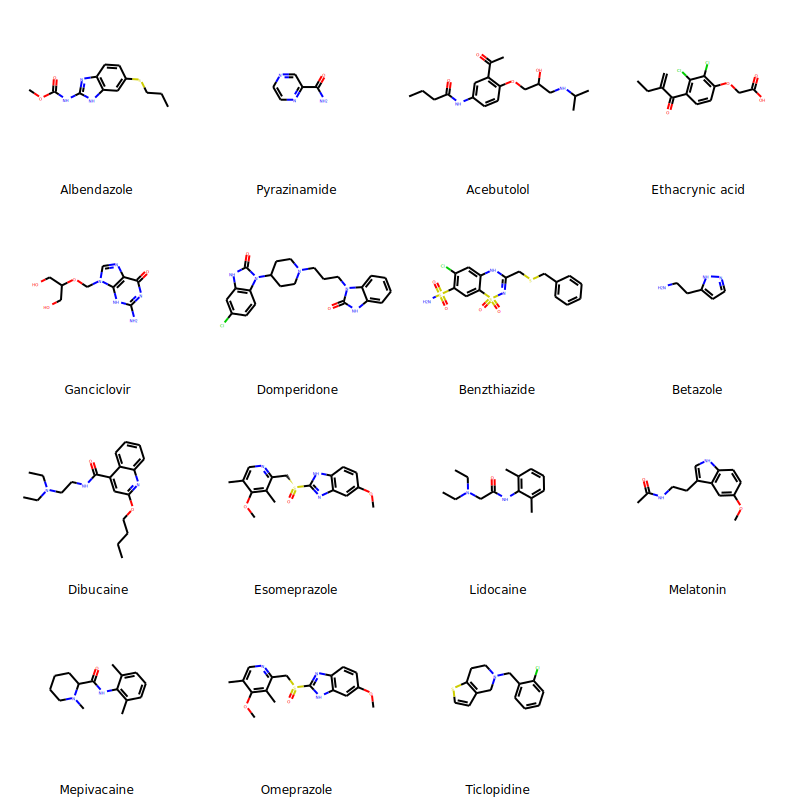

In [21]:
from rdkit.Chem import Draw
sel = list(sorted_mol)
Draw.MolsToGridImage(sel, molsPerRow=4, useSVG=True, legends=list(sorted_names))

In [25]:
df = pd.DataFrame( list(zip(list(sorted_names), list(sorted_prob))), columns =['Names', 'Prob'])
df

,Names,Prob
0,Albendazole,0.97
1,Pyrazinamide,0.97
2,Acebutolol,0.94
3,Ethacrynic acid,0.94
4,Ganciclovir,0.94
5,Domperidone,0.93
6,Benzthiazide,0.92
7,Betazole,0.92
8,Dibucaine,0.92
9,Esomeprazole,0.92


In [ ]:
df.to_csv('predictions.csv')